<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/%24NVDA_Algorithm_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mlp

In [4]:
from matplotlib import cycler

In [6]:
import matplotlib.pyplot as plt
from cycler import cycler

# Define the color cycle
colors = cycler('color', ['#669FEE', '#66EE91', '#998800', '#EECC55', '#788BB4', '#FFBBBE'])

# Set the Matplotlib rc parameters
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#9C9C9C")


In [7]:
def preproccessing_yf(symbol):
  df=yf.download(symbol).dropna()
  df.columns=["open","high","low","close","adj close","volume"]
  df.index.name="time"
  del df["adj close"]
  return df


In [10]:
df=preproccessing_yf("NVDA")

[*********************100%%**********************]  1 of 1 completed


In [12]:
df

,open,high,low,close,volume,SMA fast,SMA slow
time,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,271468800,NaN,NaN
1999-01-25,0.442708,0.458333,0.410156,0.453125,51048000,NaN,NaN
1999-01-26,0.458333,0.467448,0.411458,0.417969,34320000,NaN,NaN
1999-01-27,0.419271,0.429688,0.395833,0.416667,24436800,NaN,NaN
1999-01-28,0.416667,0.419271,0.412760,0.415365,22752000,NaN,NaN
...,...,...,...,...,...,...,...
2024-02-15,738.690002,739.750000,724.000000,726.580017,42012200,618.418333,550.036666
2024-02-16,741.000000,744.020020,725.010010,726.130005,49391800,626.623333,553.737333
2024-02-20,719.469971,719.559998,677.340027,694.520020,70483300,633.408333,556.988667


In [11]:
#create simple moving average
df["SMA fast"]=df["close"].rolling(30).mean()

#create simple moving average
df["SMA slow"]=df["close"].rolling(60).mean()



<Axes: xlabel='time'>

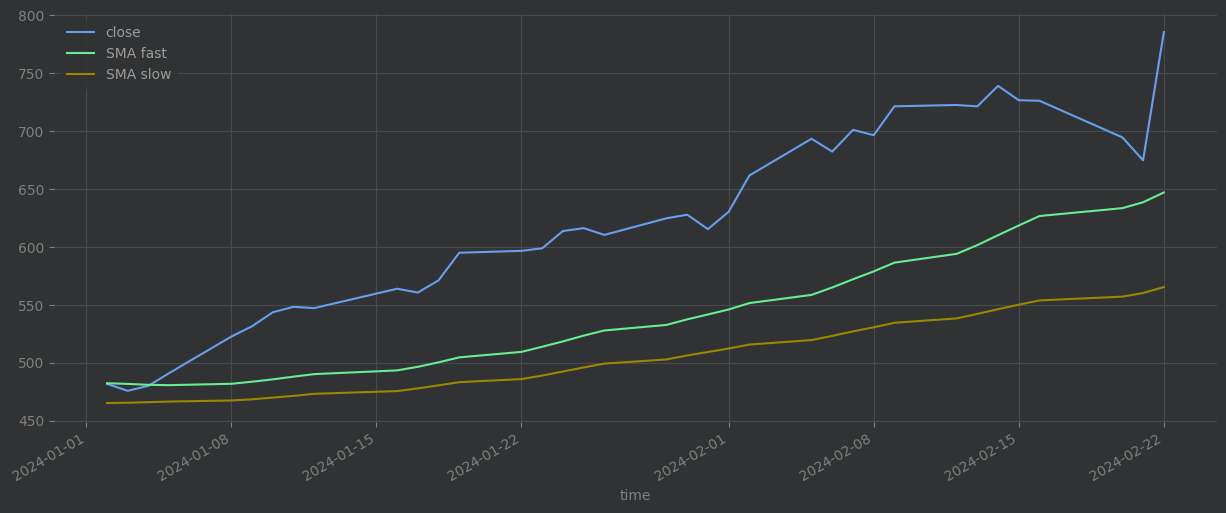

In [14]:
df[["close", "SMA fast", "SMA slow"]].loc["2024"].plot(figsize=(15, 6))


<Axes: xlabel='time'>

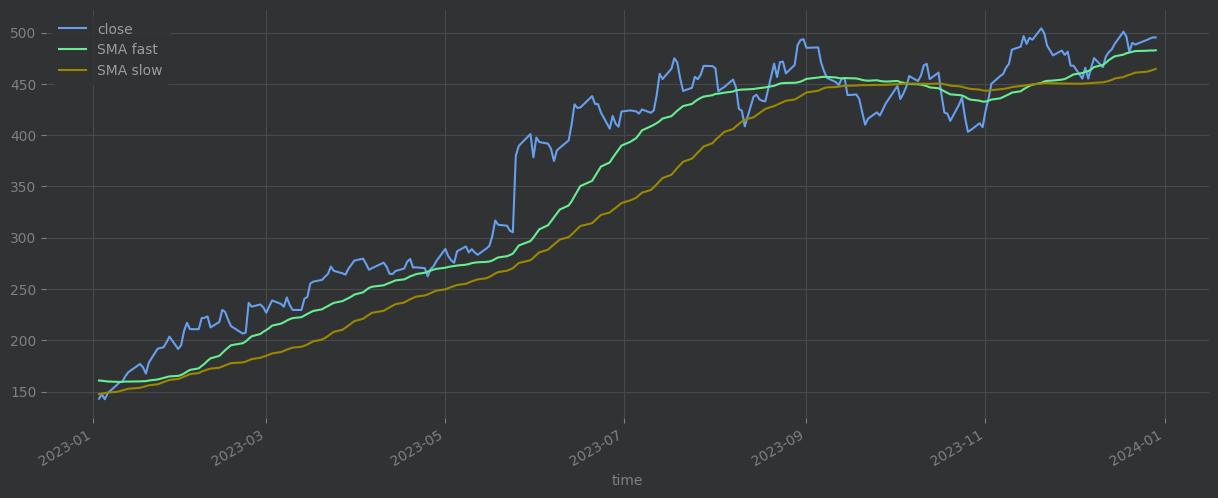

In [15]:
df[["close", "SMA fast", "SMA slow"]].loc["2023"].plot(figsize=(15, 6))


<Axes: xlabel='time'>

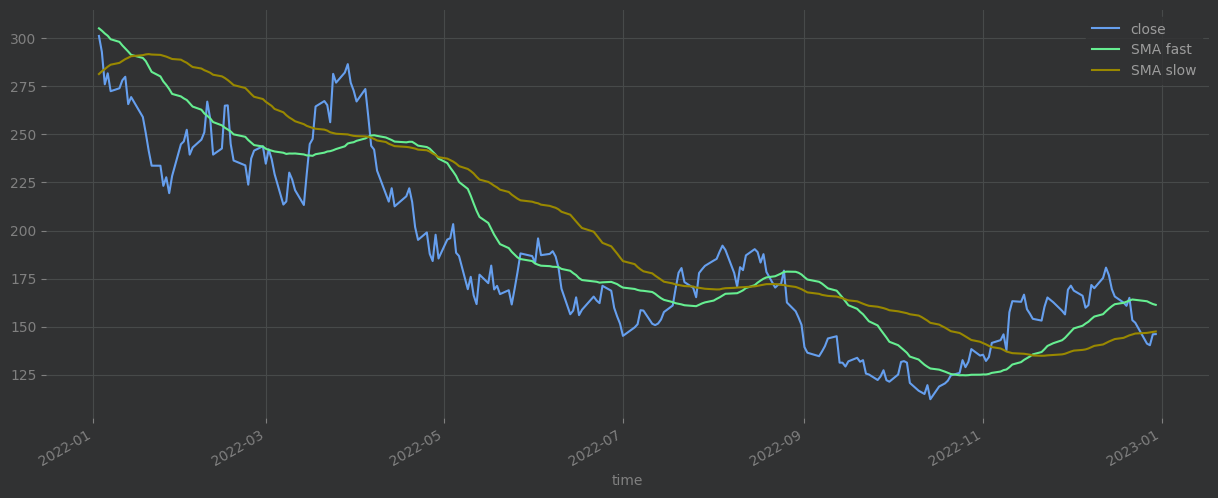

In [16]:
df[["close", "SMA fast", "SMA slow"]].loc["2022"].plot(figsize=(15, 6))


In [17]:
year="2023"

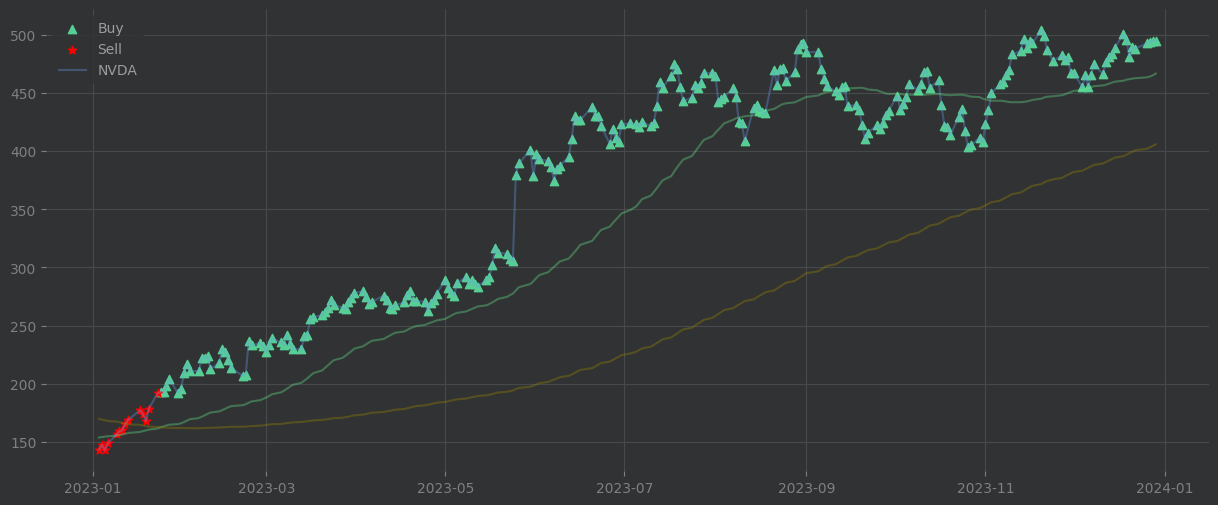

In [23]:
# We plot all the signals to be sure that they are correct
year = "2023"

# Select all signal in an index list to plot only these points
idx_open = df.loc[(df["signal"] == 1) & (df.index.year == int(year))].index
idx_close = df.loc[(df["signal"] == -1) & (df.index.year == int(year))].index

# Adapt the size of the graph
plt.figure(figsize=(15, 6))

# Plot the points of the open long signal in green and sell in red
plt.scatter(idx_open, df.loc[idx_open]["close"], color="#57CE95", marker="^")
plt.scatter(idx_close, df.loc[idx_close]["close"], color="red", marker="*")

# Plot the resistance to be sure that the conditions are completed
plt.plot(df["close"].loc[str(year)], alpha=0.35)
plt.plot(df["SMA_fast"].loc[str(year)], alpha=0.35)
plt.plot(df["SMA_slow"].loc[str(year)], alpha=0.35)

plt.legend(["Buy", "Sell", "NVDA"])
plt.show()


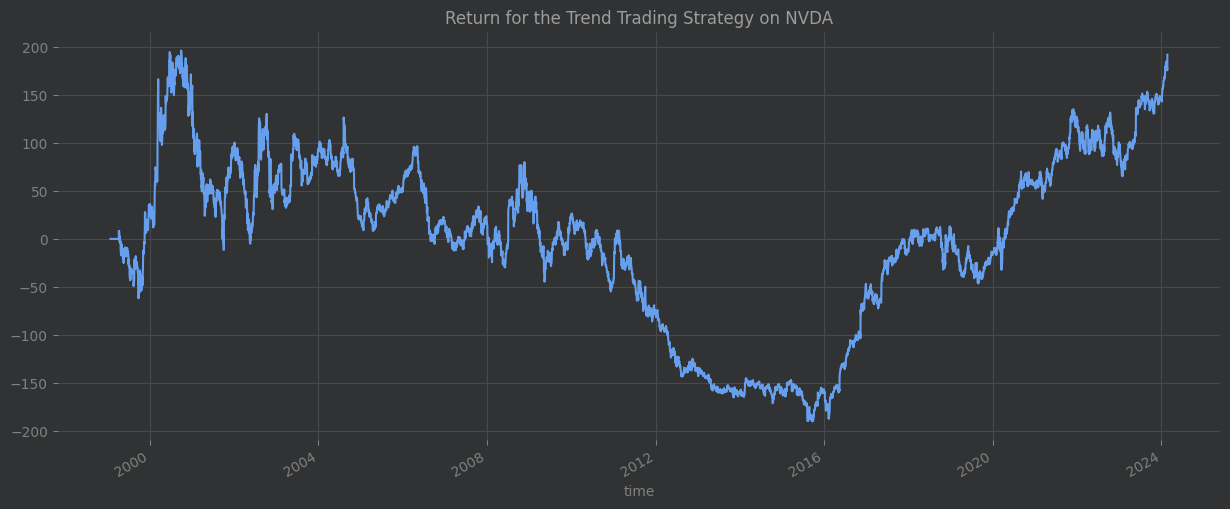

In [31]:


# Define cost_ind
cost_ind = 0.001

# Compute the position based on the signal
df["position"] = df["signal"].fillna(method="ffill")

# Compute the cost based on the signal
df["cost"] = (np.abs(df["signal"]) * cost_ind).fillna(value=0)

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = (df["pct"] * df["position"].shift(1) - df["cost"]) * 100

# Plot the cumulative return
df["return"].cumsum().plot(figsize=(15, 6), title="Return for the Trend Trading Strategy on NVDA")
plt.show()


In [34]:
def SMA_Strategy(input,fast_sma=30,slow_sma=60,cost_ind=0.001):
  df=preproccessing_yf(input)
  df['SMA_fast'] = df['close'].rolling(window=fast_sma).mean()
  df['SMA_slow'] = df['close'].rolling(window=slow_sma).mean()

    # Generate Trading Signals
  condition_buy = (df['SMA_fast'] > df['SMA_slow']) & (df['SMA_fast'].shift(1) < df['SMA_slow'].shift(1))
  condition_sell = (df['SMA_fast'] < df['SMA_slow']) & (df['SMA_fast'].shift(1) > df['SMA_slow'].shift(1))
  df.loc[condition_buy, 'signal'] = 1
  df.loc[condition_sell, 'signal'] = -1

    # Fill NaN values in the 'signal' column using forward fill method
  df['position'] = df['signal'].fillna(method='ffill')

    # Compute Trading Costs
  df['cost'] = (np.abs(df['signal']) * cost_ind).fillna(value=0)

    # Compute Percentage Change
  df['pct'] = df['close'].pct_change(1)

  return df


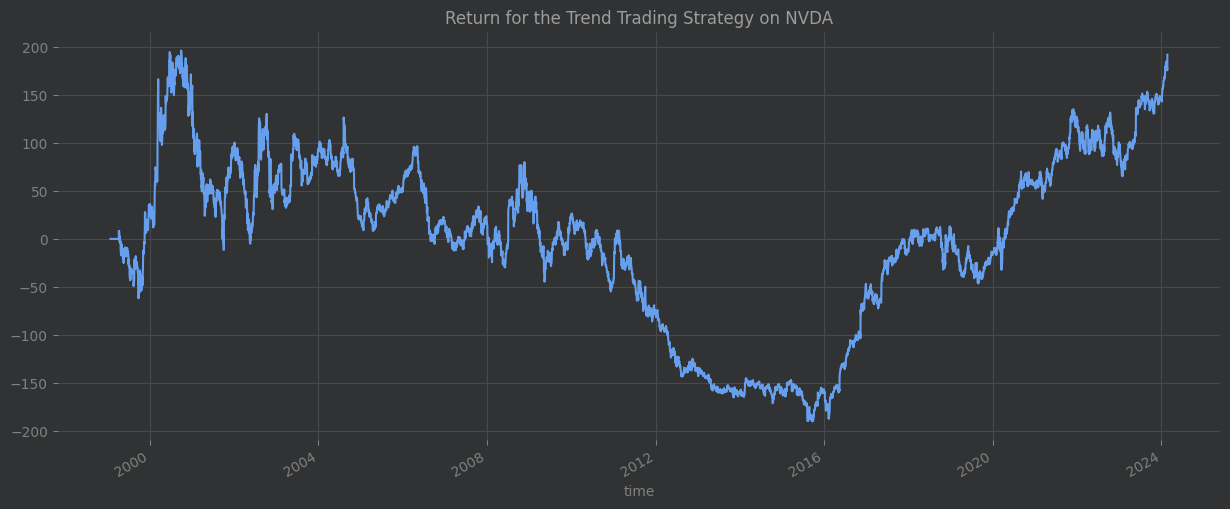

In [35]:


# Define cost_ind
cost_ind = 0.001

# Compute the position based on the signal
df["position"] = df["signal"].fillna(method="ffill")

# Compute the cost based on the signal
df["cost"] = (np.abs(df["signal"]) * cost_ind).fillna(value=0)

# Compute the percentage of variation of the asset
df["pct"] = df["close"].pct_change(1)

# Compute the return of the strategy
df["return"] = (df["pct"] * df["position"].shift(1) - df["cost"]) * 100

# Plot the cumulative return
df["return"].cumsum().plot(figsize=(15, 6), title="Return for the Trend Trading Strategy on NVDA")
plt.show()
